# Will's Workspace
## Just will and his coffee
### ...and some equations and stuff

In [3]:
%matplotlib inline

from math import *
from modsim import *

In [4]:
#arbitrary
#r-value
init_temp = 37
fin_temp = 28
env_temp = .27
t_end = 360
#dt = 10

def find_r(T_i, T_f, T_e, t_end):
    coef = log((T_f - T_e) / (T_i - T_e))
    return -coef / t_end

r = find_r(init_temp, fin_temp, env_temp, t_end)
print(r)

0.000780775000566


In [5]:
#specific heat of person
c_lbs = 3500
def add_weight(lbs):
    return c_lbs * lbs

c_avg = add_weight(62)

In [6]:
#arbitrary
#heat produced by an individual
mu = .002

In [7]:
#make system function
def make_system(T_env=0, dt=10, lbs=62, mu=.002):
    T_i = 37
    r = .00556
    c_lbs = 3500
    
    c = c_lbs * lbs
    
    system = System(T_env=T_env, T_i=T_i, 
                    r=r, mu=mu, c=c)
    return system

In [8]:
def find_r(T_i, T_f, T_env, ):
    coef = log((T_f - T_env) / (T_i - T_env))
    return -coef / dt


In [9]:
def make_system(T_env=0, t_end=10, kg=62, mu=.002, x=1,r_i =r, dt=1):
    T_i = 37                                            #initial temp
    c_kg = 3500                                              
    init = State(temp=T_i)
    
    c = c_kg * kg
    r = r_i - .0005*(x-1)
    
    system = System(init=init, T_env=T_env, 
                    r=r, mu=mu, c=c, x=x,
                    t0=0, t_end=t_end, dt=dt, T_i=T_i)
    return system

def update(state, dt, system): #updates the temperature using the function we developed
    unpack(system)
    T = state.temp
    
    T += -r * (T - T_env)*dt + mu * (x+1) #T is the temp of the person in the center
    #print(T)
    return State(temp=T)


def run_sim(system, update_func):
    
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    ts = linrange(system.t0, system.t_end-system.dt, system.dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system.dt, system)
        #frame.loc[t+1] = update(system)
    
    system.results = frame
    
def plot_sim(system):               #simple plot function, needs to be updated to make it look prettier
    plot(system.results, style= 'b-', label= 'temp')
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')
    #savefig('ind_body_temp.pdf')

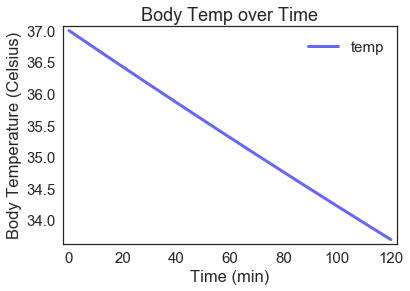

In [10]:
system = make_system(t_end=120, x=1, mu=0, dt= .5)
run_sim(system, update)
plot_sim(system)

In [11]:
#help(linrange)

In [12]:
def make_system(T_env=0, t_end=10, lbs=62, mu=.0001, x=1,r_i =.0008, dt=1):
    T_i = 37                                            #initial temp
    c_lbs = 3500                                              
    init = State(temp=T_i)
    
    c = c_lbs * lbs
    r = r_i - .000005*(x-1)
    
    system = System(init=init, T_env=T_env, 
                    r=r, mu=mu, c=c, x=x,
                    t0=0, t_end=t_end, dt=dt, T_i=T_i)
    return system

def update(state, dt, system): #updates the temperature using the function we developed
    unpack(system)
    T = state.temp
    
    T += -r * (T - T_env)*dt + mu * (x+1) #T is the temp of the person in the center
    #print(T)
    return State(temp=T)


def run_sim(system, update_func):
    
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    ts = linrange(system.t0, system.t_end, system.dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system.dt, system)
        #frame.loc[t+1] = update(system)
    
    system.results = frame
    
    
def plot_sim(system):               #simple plot function, needs to be updated to make it look prettier
    plot(system.results, style= 'b-', label= 'temp')
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')
    #savefig('ind_body_temp.pdf')
    
def rsweep(system,r1,r2,st):
    newfig()
    lin = linrange(r1,r2,st)
    for x in lin:
        system.r = x
        run_sim(system,update)
        plot(system.results)
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')

def xsweep(x1,x2,st,t_end,boo):
    newfig()
    
    if boo:
        temp_record = TimeSeries()
        
        lin = linrange(x1,x2,st)
        for x in lin:
            system = make_system(t_end=t_end,x=x)
            run_sim(system,update)
            plot(x,system.results.loc[system.t_end],'o')
            #temp_record[x] = system.results.loc[system.t_end]
            
        
        
        decorate(xlabel='Number of People',
             ylabel='Final Body Temperature (Celsius)',
             title='Body Temp over Time',
             label='final temp')  
        #print(temp_record)
    else:
        system = make_system(t_end=t_end,x=x2)
        run_sim(system, update)
        plot(system.results)
        decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time',
             label='temp')
        


    

    
    

##################################################

def find_r(T_i, T_f, T_env, ):
    coef = log((T_f - T_env) / (T_i - T_env))
    return -coef / dt


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


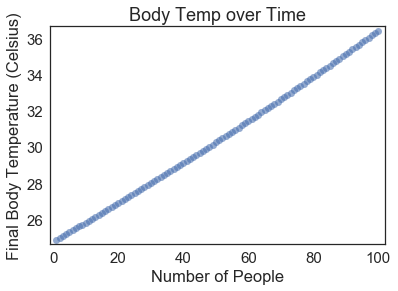

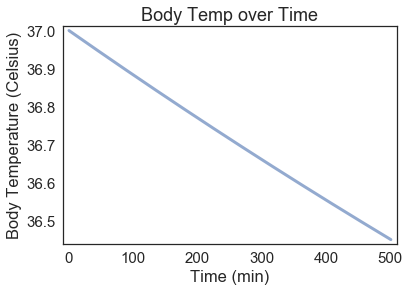

In [13]:
#sys = make_system(T_env=0, t_end=10, lbs=62, mu=.002, x=1,r_i =.0008, dt=1)
xsweep(x1=1, x2=100, st=1, t_end=500, boo=True)
xsweep(x1=1, x2=100, st=1, t_end=500, boo=False)